In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import sample
import typing
import math

# ***Support Vector Machines***
--------------------------

In [1]:
dt = """When James entered preschool, he faced significant mental and behavioral health problems, including aggressive behavior,
difficulty regulating his emotions, and trouble forming healthy relationships with peers. Despite all these difficulties,
he did not meet the diagnostic criteria for post-traumatic stress disorder (PTSD) when he was assessed by clinicians at ages 5, 9, and 16.
(More than 70% of children treated by the National Child Traumatic Stress Network [NCTSN] do not meet the criteria 
[Purbeck, C. A., et al., NCTSN Core Data Set Report, 2021].) By the time James started high school, he had been diagnosed with oppositional
defiant disorder (ODD), bipolar disorder, borderline personality disorder, and generalized anxiety disorder. He takes a cocktail of
medications, but neither his diagnoses nor his treatments address the effects of his tumultuous early years."""

In [2]:
# Consider the above text.
# We are asked to decide to which subject domain this piece of information belongs?
# Neurology / Sociology / Psychiatry / Psysiology / Developmental Psychology

# Looking at the words like mental, behavioral health, post-traumatic stress disorder (PTSD), oppositionaldefiant disorder (ODD), 
# bipolar disorder, borderline personality disorder, and generalized anxiety disorder.
# We are likely to classify this text as associated to Psychiatry / Developmental psychology

![Avatar - The Way of Water Review](./avatar2.png)

In [3]:
# Look at the above review
# The reviewer has given 10 stars and a really good and positive review.
# Note the use of following words.
# remarkable, perfect, masterpiece, amazing, phenomenal etc.

# If we see words like waste, lame, garbage, propaganda, wannabe, crap that would imply that the review is negative.
# This is a sentiment based classification task, where one classifies a document based on its word composition according to a sentiment based
# criteria.

In [4]:
# In general, a classifier can be defined as a function on the input data.
# So,

### ***$f(Medical~texts)~\rightarrow\text{{Psychiatry, Psychology, Physiology, Pathology, Rheumatology}}$***
### ***$f(Movie~reviews)~\rightarrow\text{{Positive, Negative}}$***

In [5]:
# It is typical to have numbers used to label classes e.g like -1 or +1
# And that's what SVMs or any other linear classifiers usually use.

# ***Descision Boundary***
----------------------------

In [101]:
x = range(1, 21)
y = np.random.randint(1, 50, 20)
classes = np.repeat(['o', 's'], 10)
colors = list(map(lambda _class: "red" if _class == 'o' else "blue", classes))

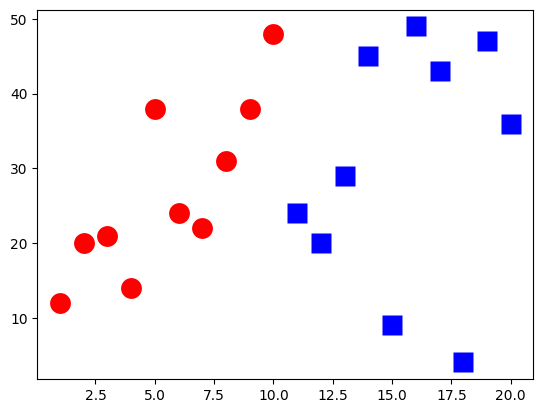

In [102]:
fig, axes = plt.subplots()
for (_x, _y, _color, _marker) in zip(x, y, colors, classes):
    axes.plot(_x, _y, marker = _marker, mfc = _color, ms = 15, linestyle = "none", mec = "none", gapcolor = "none")
plt.show()

In [103]:
# Look at the data points in this 2 dimensional space.
# Some of them are marked by blue stars while others are marked by red circles.
# Let's say that the circles are class A and the stars are class B.

# Now, we need to make a boundary to separate one class from the other class
# One can choose any decision boundary
# A circle that encircles data points of a given class
# A square
# Any other random irregular shapes

# A classification function is represented by a decision surface or decision boundary.

In [104]:
# Whenever one uses a decision boundary, the main purpose is that when you get a unlabelled data point
# You can label it using the decision boundary.
# If the unlabelled data point falls inside the boundary of class A, then label that point A.

In [124]:
y

23

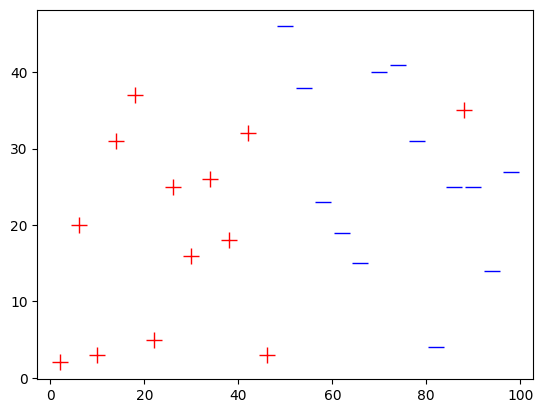

In [155]:
# There are some other factors to consider when choosing a decision boundary.

# Lets say the we have a set of positive and negative data points.

x = np.arange(2, 100, 4)
y = np.random.randint(1, 50, size = x.shape[0])
markers = list(map(lambda _x: '+' if _x < 50 else '_', x))
colors = list(map(lambda marker: "red" if marker == '+' else "blue", markers))

fig, axes = plt.subplots()
for (_x, _y, mar, col) in zip(x, y, markers, colors):
    axes.plot(_x, _y, linestyle = "none", marker = mar, mec = col, ms = 12)
axes.plot(88, 35, linestyle = "none", marker = '+', mec = "red", ms = 12)

plt.show()

In [153]:
# ToDo
# Implemet this soon :(

# Draw a circle around the red cross at right

def circle_points(centre: typing.Tuple(float, float), radius: float, step_axisx: float) -> typing.Tuple[typing.List[float], typing.List[float]]:
    import math
    rsq: float = radius * radius
    xaxis: typing.List[float] = []
    while ((centre + step_axisx) <= radius):
        axes.apply_aspect(centre + step_axisx )
    yaxis: typing.List[float] = [math.sqrt(rsq - (x * x)) for x in xaixs]
    return (xaixs, yaxis)

In [154]:
# Looking at the above data,
# An irregular polygon can encircle all the positive data points.
# This will give a 100% accuracy on training data, since every point has been labelled correctly.
# But this might produce unpredictable results in test data, since we cannot expect the data points to be distributed similarly to 
# the training data.
# There is a good degree of clustering in the training data but one cannot expect the data points in test data to be clustered similarly.

In [156]:
# This problem happens because of the way that we defined the decision boundary.
# This problem is called data overfitting, where the decision boundaries learned from training data work very well on training data
# but fails to generalize to test data.

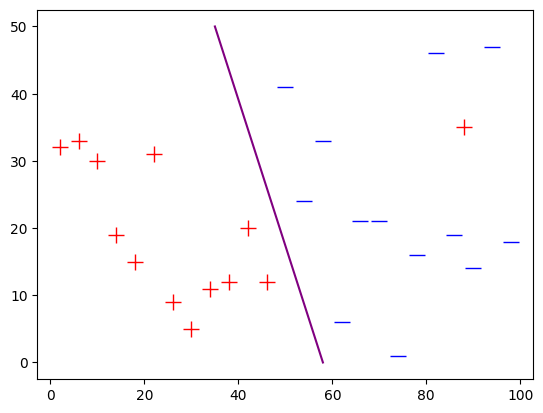

In [200]:
# Instead of irregular boundaries, consider boundaries defined by straight lines.


x = np.arange(2, 100, 4)
y = np.array([32, 33, 30, 19, 15, 31,  9,  5, 11, 12, 20, 12, 41, 24, 33,  6, 21, 21,  1, 16, 46, 19, 14, 47, 18])


markers = list(map(lambda _x: '+' if _x < 50 else '_', x))
colors = list(map(lambda marker: "red" if marker == '+' else "blue", markers))

fig, axes = plt.subplots()
for (_x, _y, mar, col) in zip(x, y, markers, colors):
    axes.plot(_x, _y, linestyle = "none", marker = mar, mec = col, ms = 12)
axes.plot(88, 35, linestyle = "none", marker = '+', mec = "red", ms = 12)

axes.plot([35, 58], [50, 0], color = "purple")

plt.show()

In [2]:
# The above line separates the positive data points from the nengative data points
# But it has made some mistakes.
# This line MAXIMALLY separates the positives from the negatives
# But does not classify all data points correctsly!
# It is also not possible for a single straight line to separate the positive data points from the engative data points.

# In a 2D data representation, this boundary is a line
# In a 3D data representation, this boundary will be a plane
# In an n dimensional data representation, this boundary will be a hyper plane.

In [3]:
# In general, use of simple models/classifiers to fit the data is called Occam's razor
# And simple models often generalize well.
# These models work generally well on test data.

# One should expect a few misclassifications, but the model will be a better solution overall.

### ***Finding the linear boundary***
_________________________

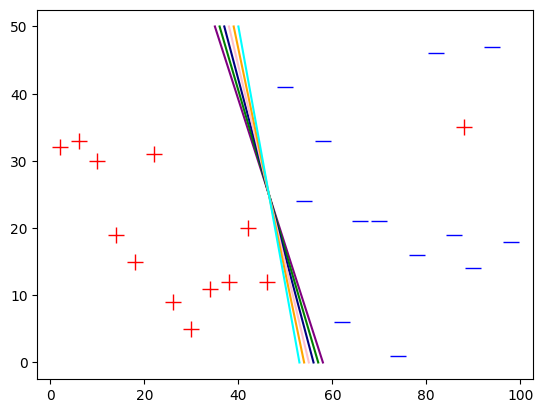

In [16]:
# A lot of algorithms are available for this.
# Finding the line implies finding the slope of the line.
# e.g. 
# Perceptron
# Linear Discriminative analyses
# Linear least squares

# A major issue with these linear boundaries is that if there's a linear boundary, there can be, by definition, infinitely many boundaries

x = np.arange(2, 100, 4)
y = np.array([32, 33, 30, 19, 15, 31,  9,  5, 11, 12, 20, 12, 41, 24, 33,  6, 21, 21,  1, 16, 46, 19, 14, 47, 18])
markers = list(map(lambda _x: '+' if _x < 50 else '_', x))
colors = list(map(lambda marker: "red" if marker == '+' else "blue", markers))
fig, axes = plt.subplots()
for (_x, _y, mar, col) in zip(x, y, markers, colors):
    axes.plot(_x, _y, linestyle = "none", marker = mar, mec = col, ms = 12)
axes.plot(88, 35, linestyle = "none", marker = '+', mec = "red", ms = 12)
axes.plot([35, 58], [50, 0], color = "purple")
axes.plot([36, 57], [50, 0], color = "green")
axes.plot([37, 56], [50, 0], color = "navy")
axes.plot([38, 55], [50, 0], color = "pink")
axes.plot([39, 54], [50, 0], color = "orange")
axes.plot([40, 53], [50, 0], color = "cyan")
plt.show()